### Name: Dhaval Patel
### Title: Assignment 1 - Data Preparation


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-3-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
INFILE = "HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )

'''
Print a transpose of the data so that it will fit on the screen
'''
# print( df.head() )
# print( df.head().T )
# df.head()
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641.0,1109.0,767.0,1425.0,NaN
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860.0,70053.0,13500.0,NaN,97800.0
VALUE,39025.0,68400.0,16700.0,NaN,112000.0
REASON,HomeImp,HomeImp,HomeImp,NaN,HomeImp
JOB,Other,Other,Other,NaN,Office
YOJ,10.5,7.0,4.0,NaN,3.0
DEROG,0.0,0.0,0.0,NaN,0.0
DELINQ,0.0,2.0,0.0,NaN,0.0


In [5]:
'''
Statistical description of data transposed
'''
# print(df.dtypes)
# print(df.describe())
print(df.dtypes)
df.describe().T

TARGET_BAD_FLAG    int64  
TARGET_LOSS_AMT    float64
LOAN               int64  
MORTDUE            float64
VALUE              float64
REASON             object 
JOB                object 
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,1189.0,13414.576955,10839.455965,224.000000,5639.000000,11003.000000,17634.000000,78987.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000


- We have 5960 people whether the loan flag bad or not. The average value for TARGET_BAD_FLAG shows about 19% of the people have bad loans.

- For the TARGET_LOSS_AMT flag counts shows that 1189 people that had bad loans and amount was not repaid. The average loan amount that was not repaid was 13414 dollars but that value went as high as 78987 dollars which is an outlier

- The minimum loan not repaid was 224 dollars that kind of small as well which is kind of unusual to see as well but as we observe 50% of loan amount not repaid is around 11,000 dollars.


In [6]:
'''
Find the variables that are objects (strings), integers, and floats. Put their in a list.
'''
dt = df.dtypes

objList = []
intList = []
floatList = []
for i in dt.index:
    if i in ([TARGET_F, TARGET_A]): continue #ignore these two columns
    if dt[i] in (["object"]): objList.append(i)
    if dt[i] in (["float64"]): floatList.append(i)
    if dt[i] in (["int64"]): intList.append(i)

print("OBJECTS ")
print(" ------- ")
for i in objList:
    print(i)
print(" ===============\n")

print("INTEGER ")
print(" ------- ")
for i in intList:
    print(i)
print("===============\n")


print("FLOAT ")
print(" ----- ")
for i in floatList:
    print(i)
print("===============\n")


OBJECTS 
 ------- 
REASON
JOB

INTEGER 
 ------- 
LOAN

FLOAT 
 ----- 
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC



In [7]:
'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
Group the dataframe by whatever CLASS REASON, JOB in this case save it into g variable
Calculate mean value for objects based on TARGET flag if they bad loan or not
If the loan was bad calculate average loan amount for all object based on TARGET_A that was not repaid

'''

for i in objList:
    print(" Class = ", i)
    g = df.groupby(i)  #group the dataframe by whatever CLASS REASON, JOB in this case save it into g variable
    print(g[i].count()) 
    x = g[ TARGET_F ].mean() #calculate mean value for objects based on TARGET flag if they bad loan or not
    print( "Bad Loan Prob (Bank lost Money)", x )
    print( " ................. ")
    x = g[ TARGET_A ].mean()   #If the load was bad calculate average loan amount for all object based on TARGET_A that was not repaid                             
    print( "Loss Amount", x )  
    print(" ===============\n\n\n ")
    

 Class =  REASON
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Bad Loan Prob (Bank lost Money) REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount REASON
DebtCon    16005.163758
HomeImp    8388.090909 
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  JOB
JOB
Mgr        767 
Office     948 
Other      2388
ProfExe    1276
Sales      109 
Self       193 
Name: JOB, dtype: int64
Bad Loan Prob (Bank lost Money) JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64


 


### Analysis: Explore both Input (Categorical) and Target variables
### Object: Reason(why do they want a loan)
- We observed that 18.9% of the people who are consolidating debt had bad loans(TARGET_F) that might mean they are in financial trouble. The loan amount not repaid (TARGET_A) was 16000 dollars which is double than the amount of the loan that was not repaid with reasoning of home improvement. 
- Whereas, 22.2% of the people who had reasoning of home improvement had bad loans (TARGET_F). The loan amount not repaid (TARGET_A) was around 8,000 dollars. Hence, it shows that reasoning consolidating debt is more risker than home improvement loans

### Object: JOB(what do they do for living)
- Even though Self and Manager Sales jobs title have higher percentage of 30%(self) and 34%(sales) for bad loans percentage compare to other job titles and the loan amount not repaid is much is around 16,000 dollars for sales and 22,000 dollars for self employee job title. This indicates that these jobs are unstables and more riskier than others. 
- The Office, Mgr, and ProfExe job should be stable and less riskier as the probability of bad loans is small and amount of loan not repaid is averaging less compare to others.


['DebtCon', 'HomeImp', nan]
[3928, 1780, 252]


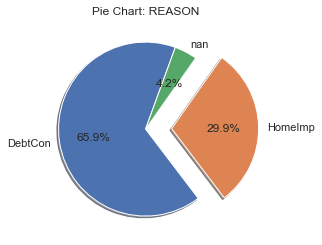

In [8]:
'''
EXPLORE THE PIE CHART CATEGORICAL / OBJECT VARIABLES
We are not removing missing value while exploring using pie chart 
'''
    
x = df["REASON"].value_counts(dropna=False)
theLabels = x.axes[0].tolist()
print(theLabels)
theSlices = list(x)
print(theSlices)
explodeList = [ 0 for i in theSlices ]
# print(explodeList)
explodeList[1] = 0.30
# print(explodeList)
plt.pie( theSlices,
        labels=theLabels,
        startangle = 70,
        explode=explodeList,
        shadow=True,
        autopct="%1.1f%%")
plt.title("Pie Chart: REASON")
plt.show()


### Analysis: Explore both the Input (Categorical) variables using Pie Chart
### Pie Chart Analyisis 1: Reason(why do they want a loan)
- Based on the pie chart its shows 29.9% reasoning behind taking loan is for home improvement (HomeImp). 
- Also, we see 4.2% of the data falls under the nan category since we haven't removed missing values from our data. 
- Lastly, 65.9% of the data has consolidating debt (DebtCon) most common reasoning for taking loan which is risker because based on previous observation it had higher probability of having bad loans and amount not being repaid compare to home improvement loan.
- Since, 'DebtCon' reasoning is most common based on the pie chart will be using to imputate missing values with mode for categorical JOB variable.

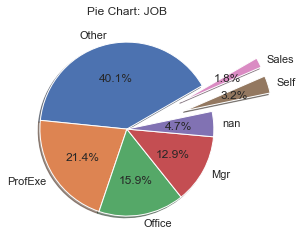

In [9]:
x = df["JOB"].value_counts(dropna=False)
theLabels = x.axes[0].tolist()
# print(theLabels)
theSlices = list(x)
explodeList = [ 0 for i in theSlices ]
# print(explodeList)
explodeList[5] = 0.70
explodeList[6] = 0.70
# print(explodeList)
plt.pie( theSlices,
        labels=theLabels,
        startangle = 30,
        explode=explodeList,
        shadow=True,
        autopct="%1.1f%%")
plt.title("Pie Chart: " + i)
plt.show()

### Pie Chart Analyisis 2: JOB(what do they do for living)
- Firstly, I was exploded 2 job titles 'Sales' and 'Self' in the pie chart above because even though they cover small portion of the data but based on prior observation they had higher probability of having bad loan and higher amount of loan was not repaid which makes it riskers jobs and less stable after to compare job titles. 

- While, 40% of that have job titles 'Others' most common job title in this dataset, and needed further analysis it since we don't know specific job category. But based on prior observation on the probability of having bad loans (TARGET_F) 'Others' and 'Mgr' job title would be consider neutral and slight stable nor risky job titles.

- Since, 'Other' job title is most common based on the pie chart will be using to imputate missing values with mode for categorical JOB variable.

- Lastly, 21.4% of the data lie under 'ProfExec' and 15.9% under 'Office' are the most stable and less risky job titles compare to other job titles. 

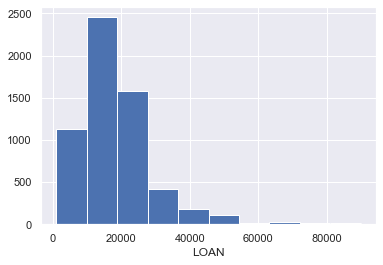

In [10]:
'''
EXPLORE THE NUMERICAL INTEGER VARIABLES
WITH HISTOGRAM 
'''

for i in intList :
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()

### Analysis: Explore both the Input (Numerical) variables using Histogram
### Histogram Analyisis 1: LOAN(HMEQ Credit Line)
- The loan distribution based on the histogram plot shows data is right positively skewed because of outliers. Around 2500 people have taken loan amount of around 20,0000 dollars which would show that it would a good choice if we pick the median for the loan amount distribution to fillup missing values for the loan amount column

- Most of the data lies below loan amount of estimating 30,000 dollars, after that we observe that as load amount gradually increases less people are taking loans which makes sense based on different job titles, and reasoning for taking loans. 
- Mild outliers to be consider based on distribution after 300,000 dollars less than 500 people took loan above that amount, and we see one extreme outlier someone took a loan of above 600,000 dollars


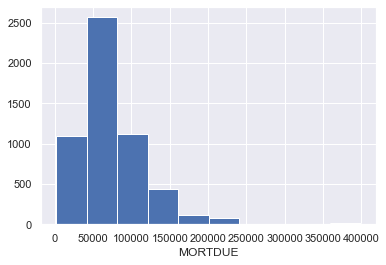

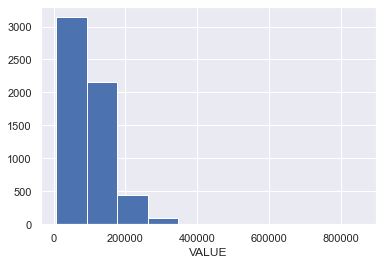

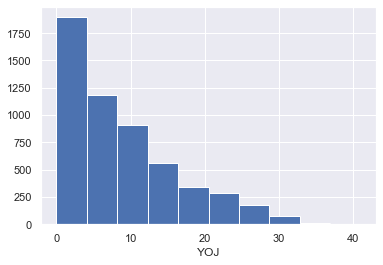

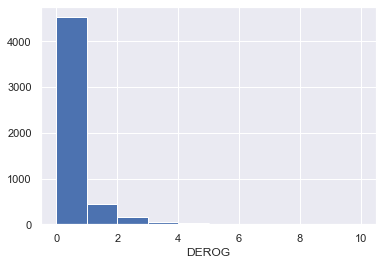

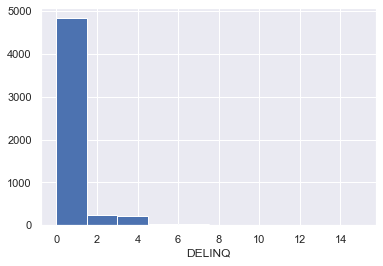

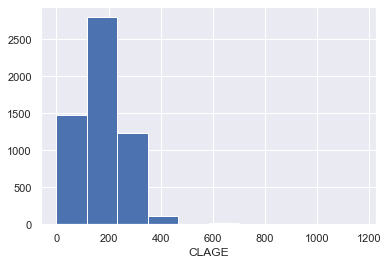

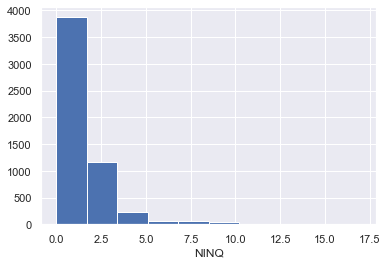

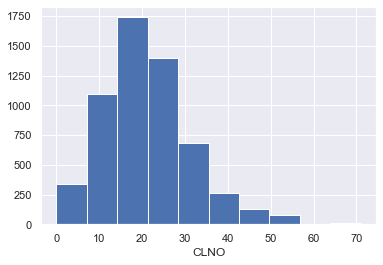

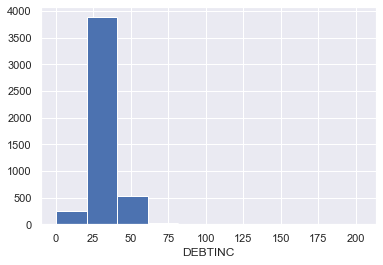

In [11]:
'''
EXPLORE THE NUMERICAL FLOAT VARIABLES
WITH HISTOGRAM 
'''

for i in floatList :
    plt.hist(df[i])
    plt.xlabel(i)
    plt.show()


### Histogram Analyisis 2: Input (float Numerical variables)
- Based on all the histogram plot the credit line age (CLAGE), number of credit lines (CLNO), and debt income ratio (DEBTINC) distribution is almost normally distributed but slightly skewed to the right these variable have relationship with each other. 
- For debt income ratio (DEBTINC) distribution the average of data lies above 25% to below 50% ideally is good sign that people with lower debt income ratio below 25% and between 25%-40% this (DEBTINC) ratio have better chance to get the loan or credit they want.
- All the other numerical variables such as outstanding mortgage balance (MORTDUE), home value (VALUE), years on job (YOJ), derogatory marks on credit (DEROG), delinquencies on the current report (DELINQ), and number of inquiries (NINQ) distribution of data is right positively skewed because of outliers. Analyzing the histogram it indicates that picking median to fill up missing value for these column would be good technqiue for now.

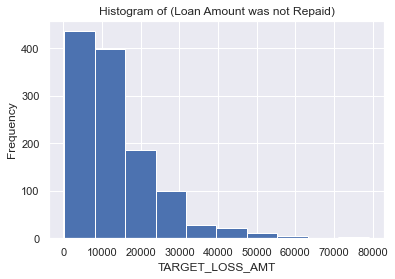

In [12]:
'''
EXPLORE THE NUMERICAL FLOAT VARIABLES
WITH HISTOGRAM 
'''
plt.hist(df[TARGET_A])
plt.title("Histogram of (Loan Amount was not Repaid)")
plt.ylabel("Frequency")
plt.xlabel("TARGET_LOSS_AMT")
plt.show()


### Histogram Analyisis 3: TARGET_LOSS_AMOUNT 
- The pattern of skewness can be analyzed from histogram of loan distribution is showing more skewed to the right because of outliers. 
- Most of the data lies be under 250,000 dollars of loan that was not repaid after that there mild outliers because less than 100 people that have not repaid amount higher than that 250,000 dollars
- We can see one extreme outlier loan amount of 600,000 dollars that was not repaid to the bank 

In [13]:
for i in objList:
    print(i)
    print(df[i].unique())
    g = df.groupby(i)
    print(g[i].count())
    print( "MOST COMMON = ", df[i].mode()[0]) #this is going to give string 
    print( "MISSING = ", df[i].isna().sum())
    print( "\n")

REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
MOST COMMON =  DebtCon
MISSING =  252


JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr        767 
Office     948 
Other      2388
ProfExe    1276
Sales      109 
Self       193 
Name: JOB, dtype: int64
MOST COMMON =  Other
MISSING =  279




### Exploration Analysis: Object Variables
- First, we tried find the unique value and count of our categorical variables. 
- We found out that consolidating debt(DebtCon) is most common reasoning to taking loans in our dataset, and it has 252 missing values.
- Similarly, most common job title is Other in our dataset, the JOB column has 279 missing values.

In [14]:
"""
IMPUTATED Means fixing missing value
FILL IN MISSING WITH THE MODE
"""

for i in objList:
    if df[i].isna().sum() == 0: continue
    print(i)
    print("HAS MISSING")
    NAME = "IMP_"+i
    print( NAME )
    df[NAME] = df[i]  #create an exact copy of job into IMP_JOB has an example
    df[NAME] = df[NAME].fillna(df[NAME].mode()[0]) #Other is what we filled it with most common
    print( "variable",i," has this many missing", df[i].isna().sum() )
    print( "variable",NAME," has this many missing", df[NAME].isna().sum() )

    g = df.groupby(NAME)
    print(g[NAME].count())
    print("\n")
#     df = df.drop( i, axis = 1)

REASON
HAS MISSING
IMP_REASON
variable REASON  has this many missing 252
variable IMP_REASON  has this many missing 0
IMP_REASON
DebtCon    4180
HomeImp    1780
Name: IMP_REASON, dtype: int64


JOB
HAS MISSING
IMP_JOB
variable JOB  has this many missing 279
variable IMP_JOB  has this many missing 0
IMP_JOB
Mgr        767 
Office     948 
Other      2667
ProfExe    1276
Sales      109 
Self       193 
Name: IMP_JOB, dtype: int64




### Exploration Analysis 1: Missing Values (Object Variables)
- Always create a new variable "IMP_" Imputated_value variable to fix missing values. Because if anyone else is using the dataset they would assume original variable has missing values. We created imputated job (IMP_JOB) and imputated reason (IMP_REASON) as new variables so there is no confusion.
- We are filling up the missing value using mode which most common job and reasoning in our dataset based on pie chart. 
- This is one of the technique we are using to fill up the missing values since we don't have a lot of missing values in our dataset for these columns. But based business rules after further exploratory data analysis if some of these value are highly predictive we came back to revisit the technique we are using to fill up missing values


In [15]:
for i in objList:
    print(" Class = ", i)
    print(df[i].unique())
    g = df.groupby(i)  #group the dataframe by whatever CLASS REASON, JOB in this case save it into g variable 
    x = g[ TARGET_F ].mean() #calculate mean value for objects based on TARGET flag if they bad loan or not
    print( "Bad Loan Prob (Bank lost Money)", x )
    print( " ................. ")
    x = g[ TARGET_A ].mean()   #If the load was bad calculate average loan amount for all object based on TARGET_A that was not repaid                             
    print( "Loss Amount (Loan amount not repaid)", x )  
    print(" ===============\n\n\n ")

 Class =  REASON
['HomeImp' nan 'DebtCon']
Bad Loan Prob (Bank lost Money) REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount (Loan amount not repaid) REASON
DebtCon    16005.163758
HomeImp    8388.090909 
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
Bad Loan Prob (Bank lost Money) JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount (Loan amount not repaid) JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64


 


### Convert the Object variables to Numerical variables Using One-Hot Encoding.

- Creating flag variables for JOB and REASON based on category. In one-hot encoding flag variable that matches criteria will hot set to 1 rest of the flag variables will set to 0
- One-Hot encoding for REASON as category variable and JOB as categorical variable will be used in following method below
- Both variables JOB and REASON (categorical) are predictive of both prob of bad loans and amount loan not repaid
- z_ flag for categorical variables

In [16]:
for i in objList:
    if (i in objList):
        print("Class = ", i )
        thePrefix = "z_" + i #z_ Categorical Variables
        print( thePrefix )
        y = pd.get_dummies(df[i], prefix=thePrefix, dummy_na=False) #pd.get_dummies that one hot encoding
        print(type(y))
        print(y.head().T)
        df = pd.concat([df, y], axis=1)
        df = df.drop( i, axis = 1)

Class =  REASON
z_REASON
<class 'pandas.core.frame.DataFrame'>
                  0  1  2  3  4
z_REASON_DebtCon  0  0  0  0  0
z_REASON_HomeImp  1  1  1  0  1
Class =  JOB
z_JOB
<class 'pandas.core.frame.DataFrame'>
               0  1  2  3  4
z_JOB_Mgr      0  0  0  0  0
z_JOB_Office   0  0  0  0  1
z_JOB_Other    1  1  1  0  0
z_JOB_ProfExe  0  0  0  0  0
z_JOB_Sales    0  0  0  0  0
z_JOB_Self     0  0  0  0  0


In [17]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641.0,1109.0,767.0,1425.0,NaN
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860.0,70053.0,13500.0,NaN,97800.0
VALUE,39025.0,68400.0,16700.0,NaN,112000.0
YOJ,10.5,7.0,4.0,NaN,3.0
DEROG,0.0,0.0,0.0,NaN,0.0
DELINQ,0.0,2.0,0.0,NaN,0.0
CLAGE,94.366667,121.833333,149.466667,NaN,93.333333
NINQ,1.0,0.0,1.0,NaN,0.0


In [18]:
#Adding IMP_JOB and IMP_REASON to the object list 
dt = df.dtypes
objList = []
for i in dt.index:
    if i in ([TARGET_F, TARGET_A]) : continue
    if dt[i] in (["object"]) : objList.append(i)
objList

['IMP_REASON', 'IMP_JOB']

In [19]:
#Analysis to see if we can throw one of the one-encoding flag variables
SomeData = df.head().T
for r in range( SomeData.shape[0] ):
    print( SomeData.iloc[r,] )
    print("---")

0    1
1    1
2    1
3    1
4    0
Name: TARGET_BAD_FLAG, dtype: object
---
0    641.0 
1    1109.0
2    767.0 
3    1425.0
4    NaN   
Name: TARGET_LOSS_AMT, dtype: object
---
0    1100
1    1300
2    1500
3    1500
4    1700
Name: LOAN, dtype: object
---
0    25860.0
1    70053.0
2    13500.0
3    NaN    
4    97800.0
Name: MORTDUE, dtype: object
---
0    39025.0 
1    68400.0 
2    16700.0 
3    NaN     
4    112000.0
Name: VALUE, dtype: object
---
0    10.5
1    7.0 
2    4.0 
3    NaN 
4    3.0 
Name: YOJ, dtype: object
---
0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: DEROG, dtype: object
---
0    0.0
1    2.0
2    0.0
3    NaN
4    0.0
Name: DELINQ, dtype: object
---
0    94.366667 
1    121.833333
2    149.466667
3    NaN       
4    93.333333 
Name: CLAGE, dtype: object
---
0    1.0
1    0.0
2    1.0
3    NaN
4    0.0
Name: NINQ, dtype: object
---
0    9.0 
1    14.0
2    10.0
3    NaN 
4    14.0
Name: CLNO, dtype: object
---
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
N

In [20]:
#Adding both Integer and Floating type numerical variables into numList
dt = df.dtypes
numList = []
for i in dt.index:
    if i in ([TARGET_F, TARGET_A]): continue #ignore these two columns
    if dt[i] in (["int64", "float64"]): numList.append(i)
numList

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

### Exploration Analysis 1: Missing Values (For VALUE Numerical Variables)
- To imputate missing for 'VALUE' of the house variable based on the analysis we first grouped by imputated job with median of missing value was one good technique. 
- When we grouped 'IMP_JOB' with other variables such as 'DEBTINC' ratio but the median was constant for all job category that's reason when grouped by 'VALUE' with 'IMP_JOB' the median value of the house was more reasonable in term of job title. 
- If loan was not repaid to the bank by people their property held as collateral for loans. Therefore, the value of the house tieing with job category would have further build better predictive model. Also analyzing person's information ability to pay loan to the bank. 


In [21]:
g = df.groupby("IMP_JOB")
i = "VALUE"
print( g[i].median())


IMP_JOB
Mgr        101258.0
Office     89094.5 
Other      76864.5 
ProfExe    110007.0
Sales      84473.5 
Self       130631.0
Name: VALUE, dtype: float64


In [22]:
i = "VALUE"
FLAG = "M_" + i
IMP = "IMP_"+ i

df[FLAG] = df[i].isna() + 0
df[IMP] = df[i]
df.loc[df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP] = 76864.5
df.loc[df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP] = 84473.5
df.loc[df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP] = 89094.5
df.loc[df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP] = 101258.0
df.loc[df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP] = 110007.0
df.loc[df[IMP].isna() & df["IMP_JOB"].isin(["Self"]), IMP] = 130631.0
df.loc[df[IMP].isna(), IMP] = df[i].median()
df = df.drop( i, axis=1)
# df = df.drop(["IMP_JOB", "IMP_REASON"], axis=1)
numList.remove(i)

### Exploration Analysis 2: Missing Values (For All Numerical Variables)
- Always create a new variable "IMP_" Imputated_value variable to fix missing values. Because if anyone else is using the dataset they would assume original variable has missing values. We created imputated as new variables so there is no confusion.
- The FLAG variables = "M_" is to show that the following column had missing value we fixed this data. Sometimes data missing is highly predictive. Instead of boolean TRUE or FALSE, the flag is to 1 if the data is missing in that column
- We are filling up the missing value using median compare to the mean because it safest techniques especially when the flag is created it tends to count of any outliers that could skewing the data compare to average.
- This is one of the safest technique for starting off we are using to fill up the missing values since there could be a lot of variables less time for analysis. But based business rules after further exploratory data analysis if someone of these value are highly predictive we came back to revisit the technique we using to fill up missing values


In [23]:
for i in numList:
    if df[i].isna().sum() == 0: continue  # If na.value == 0 we continue since there are null values
    FLAG = "M_" + i  # Flag that this column had missing value I fixed this data
    IMP = "IMP_" + i
#     print(i)
#     print(df[i].isna().sum())
#     print(FLAG)
#     print(IMP)
#     print(" -------- ")
    df[FLAG] = df[i].isna() + 0  # If missing it is = 1, and if not missing = 0
    df[IMP] = df[i]  # copy the value and created an imputated value out of it
    df.loc[df[IMP].isna(), IMP] = df[i].median()  # If the value is missing fill it in with median
    df = df.drop( i, axis=1)
df = df.drop(["IMP_JOB", "IMP_REASON"], axis=1)

In [24]:
print("DATA TYPES")
print(df.dtypes)
print("\n")

print("To see there are no mssing values except TARGET variables")
print(df.isna().sum())

DATA TYPES
TARGET_BAD_FLAG     int64  
TARGET_LOSS_AMT     float64
LOAN                int64  
z_REASON_DebtCon    uint8  
z_REASON_HomeImp    uint8  
z_JOB_Mgr           uint8  
z_JOB_Office        uint8  
z_JOB_Other         uint8  
z_JOB_ProfExe       uint8  
z_JOB_Sales         uint8  
z_JOB_Self          uint8  
M_VALUE             int64  
IMP_VALUE           float64
M_MORTDUE           int64  
IMP_MORTDUE         float64
M_YOJ               int64  
IMP_YOJ             float64
M_DEROG             int64  
IMP_DEROG           float64
M_DELINQ            int64  
IMP_DELINQ          float64
M_CLAGE             int64  
IMP_CLAGE           float64
M_NINQ              int64  
IMP_NINQ            float64
M_CLNO              int64  
IMP_CLNO            float64
M_DEBTINC           int64  
IMP_DEBTINC         float64
dtype: object


To see there are no mssing values except TARGET variables
TARGET_BAD_FLAG     0   
TARGET_LOSS_AMT     4771
LOAN                0   
z_REASON_DebtCon    0   
z_R

Converted all categorical variables numeric variables

In [25]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
z_REASON_DebtCon,0.000000,0.000000,0.000000,0.000000,0.000000
z_REASON_HomeImp,1.000000,1.000000,1.000000,0.000000,1.000000
z_JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_JOB_Other,1.000000,1.000000,1.000000,0.000000,0.000000
z_JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,0.000000
z_JOB_Sales,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
df.to_csv('prepared_hmeqloss.csv', header = True, mode = 'w', index=False)

## Summary Report

### Hypothesis: 
My hunch looking at the data is either correct or incorrect regarding people who have consolidating debt as reasoning for taking loans are more risky have any higher probability of having a bad loans, and more amount would not be repaid to the bank compare to the people who have home improvement reasoning for taking the loan.

### Statistical Description Analysis
- We have 5960 people whether the loan flag bad or not. The average value for TARGET_BAD_FLAG shows about 19% of the people have bad loans.
- For the TARGET_LOSS_AMT flag counts shows that 1189 people that had bad loans and amount was not repaid. The average loan amount that was not repaid was 13414 dollars but that value went as high as 78987 dollars which is an outlier
- The minimum loan not repaid was 224 dollars that kind of small as well which is kind of unusual to see as well but as we observe 50% of loan amount not repaid is around 11,000 dollars.

### Analysis: Explore both Input (Categorical) and Target variables
### Object: Reason(why do they want a loan)
- We observed that 18.9% of the people who are consolidating debt had bad loans(TARGET_F) that might mean they are in financial trouble. The loan amount not repaid (TARGET_A) was 16000 dollars which is double than the amount of the loan that was not repaid with reasoning of home improvement. 
- Whereas, 22.2% of the people who had reasoning of home improvement had bad loans (TARGET_F). The loan amount not repaid (TARGET_A) was around 8,000 dollars. Hence, it shows that reasoning consolidating debt is more risker than home improvement loans

### Object: JOB(what do they do for living)
- Even though Self and Manager Sales jobs title have higher percentage of 30%(self) and 34%(sales) for bad loans percentage compare to other job titles and the loan amount not repaid is much is around 16,000 dollars for sales and 22,000 dollars for self employee job title. This indicates that these jobs are unstables and more riskier than others. 
- The Office, Mgr, and ProfExe job should be stable and less riskier as the probability of bad loans is small and amount of loan not repaid is averaging less compare to others.

### Analysis: Explore both the Input (Categorical) variables using Pie Chart
### Pie Chart Analyisis 1: Reason(why do they want a loan)
- Based on the pie chart its shows 29.9% reasoning behind taking loan is for home improvement (HomeImp). 
- Also, we see 4.2% of the data falls under the nan category since we haven't removed missing values from our data. 
- Lastly, 65.9% of the data has consolidating debt (DebtCon) most common reasoning for taking loan which is risker because based on previous observation it had higher probability of having bad loans and amount not being repaid compare to home improvement loan.
- Since, 'DebtCon' reasoning is most common based on the pie chart will be using to imputate missing values with mode for categorical JOB variable.

### Pie Chart Analyisis 2: JOB(what do they do for living)
- Firstly, I was exploded 2 job titles 'Sales' and 'Self' in the pie chart above because even though they cover small portion of the data but based on prior observation they had higher probability of having bad loan and higher amount of loan was not repaid which makes it riskers jobs and less stable after to compare job titles. 
- While, 40% of that have job titles 'Others' most common job title in this dataset, and needed further analysis it since we don't know specific job category. But based on prior observation on the probability of having bad loans (TARGET_F) 'Others' and 'Mgr' job title would be consider neutral and slight stable nor risky job titles.
- Since, 'Other' job title is most common based on the pie chart will be using to imputate missing values with mode for categorical JOB variable.
- Lastly, 21.4% of the data lie under 'ProfExec' and 15.9% under 'Office' are the most stable and less risky job titles compare to other job titles. 

### Analysis: Explore both the Input (Numerical) variables using Histogram
### Histogram Analyisis 1: LOAN(HMEQ Credit Line)
- The loan distribution based on the histogram plot shows data is right positively skewed because of outliers. Around 2500 people have taken loan amount of around 20,0000 dollars which would show that it would a good choice if we pick the median for the loan amount distribution to fillup missing values for the loan amount column
- Most of the data lies below loan amount of estimating 30,000 dollars, after that we observe that as load amount gradually increases less people are taking loans which makes sense based on different job titles, and reasoning for taking loans. 
- Mild outliers to be consider based on distribution after 300,000 dollars less than 500 people took loan above that amount, and we see one extreme outlier someone took a loan of above 600,000 dollars


### Histogram Analyisis 2: Input (float Numerical variables)
- Based on all the histogram plot the credit line age (CLAGE), number of credit lines (CLNO), and debt income ratio (DEBTINC) distribution is almost normally distributed but slightly skewed to the right these variable have relationship with each other. 
- For debt income ratio (DEBTINC) distribution the average of data lies above 25% to below 50% ideally is good sign that people with lower debt income ratio below 25% and between 25%-40% this (DEBTINC) ratio have better chance to get the loan or credit they want.
- All the other numerical variables such as outstanding mortgage balance (MORTDUE), home value (VALUE), years on job (YOJ), derogatory marks on credit (DEROG), delinquencies on the current report (DELINQ), and number of inquiries (NINQ) distribution of data is right positively skewed because of outliers. Analyzing the histogram it indicates that picking median to fill up missing value for these column would be good technqiue for now.

### Convert the Object variables to Numerical variables Using One-Hot Encoding.

- Creating flag variabls for JOB and REASON based on category. In one-hot encoding flag variable that matches criteria will hot set to 1 rest of the flag variables will set to 0
- One-Hot encoding for REASON as category variable and JOB as categorical variable will be used in following method above
- Both variables JOB and REASON (categorical) are predictive of both prob of bad loans and amount loan not repaid
- z_ flag for categorical variables

### Exploration Analysis Missing Values (Object Variables)
- Always create a new variable "IMP_+i" Imputated_value variable to fix missing values. Because if anyone else is using the dataset they would assume original variable has missing values. We created imputated job (IMP_JOB) and imputated reason (IMP_REASON) as new variables so there is no confusion.
- We are filling up the missing value using mode which most common job and reasoning in our dataset. 
- This is one of the technique we are using to fill up the missing values since we don't have a lot of missing values in our dataset for these columns. But based business rules after further exploratory data analysis if someone of these value are highly predictive we came back to revisit the technique we using to fill up missing values

### Exploration Analysis 1: Missing Values (For VALUE Numerical Variables)
- To imputate missing for 'VALUE' of the house variable based on the analysis we first grouped by imputated job with median of missing value was one good technique. 
- When we grouped 'IMP_JOB' with other variables such as 'DEBTINC' ratio but the median was constant for all job category that's reason when grouped by 'VALUE' with 'IMP_JOB' the median value of the house was more reasonable in term of job title. 
- If loan was not repaid to the bank by people their property held as collateral for loans. Therefore, the value of the house tieing with job category would have further build better predictive model. Also analyzing person's information ability to pay loan to the bank.

### Exploration Analysis 2: Missing Values (For All Numerical Variables)
- Always create a new variable "IMP_" Imputated_value variable to fix missing values. Because if anyone else is using the dataset they would assume original variable has missing values. We created imputated as new variables so there is no confusion.
- The FLAG variables = "M_" is to show that the following column had missing value we fixed this data. Sometimes data missing is highly predictive. Instead of boolean TRUE or FALSE, the flag is to 1 if the data is missing in that column
- We are filling up the missing value using median compare to the mean because it safest techniques especially when the flag is created it tends to count of any outliers that could skewing the data compare to average.
- This is one of the safest technique for starting off we are using to fill up the missing values since there could be a lot of variables less time for analysis. But based business rules after further exploratory data analysis if someone of these value are highly predictive we came back to revisit the technique we using to fill up missing values
